In [9]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [121]:
df = pd.read_csv('u-mumba.csv',index_col=0)

In [122]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,123.0,16.0,23.0,22.0,14.0,16.0,16.0,16.0,u-mumba
WINS,76.0,8.0,15.0,10.0,7.0,13.0,14.0,9.0,u-mumba
DRAWS,7.0,1.0,2.0,0.0,1.0,0.0,0.0,3.0,u-mumba
LOSSES,40.0,7.0,6.0,12.0,6.0,3.0,2.0,4.0,u-mumba
FINISHING POSITION,0.0,5.0,2.0,4.0,4.0,1.0,1.0,2.0,u-mumba


In [123]:
df1 = df.transpose()

In [124]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [125]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,123.0,76.0,7.0,40.0,0.0,5187.0,1753.0,1121.0,2313.0,0.43,...,482.0,2208.0,2826.0,1193.0,1633.0,0.46,102.0,167.0,334.0,1293.0
SEASON 7,16.0,8.0,1.0,7.0,5.0,646.0,208.0,148.0,290.0,0.41,...,53.0,266.0,334.0,145.0,189.0,0.48,16.0,22.0,44.0,159.0
SEASON 6,23.0,15.0,2.0,6.0,2.0,978.0,372.0,196.0,410.0,0.47,...,87.0,459.0,558.0,274.0,284.0,0.52,15.0,41.0,82.0,289.0
SEASON 5,22.0,10.0,0.0,12.0,4.0,963.0,322.0,219.0,422.0,0.44,...,121.0,419.0,539.0,176.0,363.0,0.37,26.0,21.0,42.0,202.0
SEASON 4,14.0,7.0,1.0,6.0,4.0,594.0,188.0,131.0,275.0,0.38,...,63.0,227.0,293.0,110.0,183.0,0.41,11.0,15.0,30.0,121.0
SEASON 3,16.0,13.0,0.0,3.0,1.0,685.0,206.0,139.0,340.0,0.37,...,42.0,253.0,329.0,163.0,166.0,0.51,6.0,27.0,54.0,169.0
SEASON 2,16.0,14.0,0.0,2.0,1.0,697.0,187.0,154.0,356.0,0.34,...,31.0,237.0,364.0,180.0,184.0,0.54,16.0,20.0,40.0,196.0
SEASON 1,16.0,9.0,3.0,4.0,2.0,624.0,270.0,134.0,220.0,0.56,...,85.0,347.0,409.0,145.0,264.0,0.38,12.0,21.0,42.0,157.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [128]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
dtype: object

In [129]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [130]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [131]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5187.0,0.43,0.46,102.0,1293.0,0.617886,0.056911,0.325203,1.900000,0.216117,0.445922,14.032520,3.918699,0.577849,1.357724
SEASON 7,5.0,646.0,0.41,0.48,16.0,159.0,0.500000,0.062500,0.437500,1.142857,0.229102,0.448916,13.312500,3.312500,0.565868,1.375000
SEASON 6,2.0,978.0,0.47,0.52,15.0,289.0,0.652174,0.086957,0.260870,2.500000,0.200409,0.419223,16.173913,3.782609,0.508961,1.782609
SEASON 5,4.0,963.0,0.44,0.37,26.0,202.0,0.454545,0.000000,0.545455,0.833333,0.227414,0.438214,13.545455,5.500000,0.673469,0.954545
SEASON 4,4.0,594.0,0.38,0.41,11.0,121.0,0.500000,0.071429,0.428571,1.166667,0.220539,0.462963,11.714286,4.500000,0.624573,1.071429
SEASON 3,1.0,685.0,0.37,0.51,6.0,169.0,0.812500,0.000000,0.187500,4.333333,0.202920,0.496350,13.187500,2.625000,0.504559,1.687500
SEASON 2,1.0,697.0,0.34,0.54,16.0,196.0,0.875000,0.000000,0.125000,7.000000,0.220947,0.510760,12.875000,1.937500,0.505495,1.250000
SEASON 1,2.0,624.0,0.56,0.38,12.0,157.0,0.562500,0.187500,0.250000,2.250000,0.214744,0.352564,16.375000,5.312500,0.645477,1.312500


In [132]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [133]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [134]:
df3= df2.loc['SEASON 5',:]

In [135]:
df3 

SEASONS
MATCHES PLAYED           22.000000
WINS                     10.000000
DRAWS                     0.000000
LOSSES                   12.000000
FINISHING POSITION        4.000000
TOTAL RAIDS             963.000000
SUCCESSFUL RAIDS        322.000000
UNSUCCESSFUL RAID       219.000000
EMPTY RAIDS             422.000000
SUCCESS RAID %            0.440000
NO. OF SUPER RAIDS       10.000000
RAID TOUCH POINTS       298.000000
RAID BONUS POINTS       121.000000
TOTAL RAID POINTS       419.000000
TOTAL TACKLES           539.000000
SUCCESSFUL TACKLES      176.000000
UNSUCCESFUL TACKLES     363.000000
SUCCESSFUL TACKLE %       0.370000
NO. OF SUPER TACKLES     26.000000
ALL OUTS INFLICTED       21.000000
TOTAL ALL OUT POINTS     42.000000
TOTAL DEFENCE POINTS    202.000000
WIN%                      0.454545
DRAW%                     0.000000
LOSS%                     0.545455
WIN-LOSS%                 0.833333
UNSUCCESSFUL RAID%        0.227414
EMPTY RAID%               0.438214
AVG_RAID_TOU

In [136]:
df3.iplot(kind='bar')

In [137]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5187.0,0.43,0.46,102.0,1293.0,0.617886,0.056911,0.325203,1.900000,0.216117,0.445922,14.032520,3.918699,0.577849,1.357724
SEASON 6,978.0,0.47,0.52,15.0,289.0,0.652174,0.086957,0.260870,2.500000,0.200409,0.419223,16.173913,3.782609,0.508961,1.782609
SEASON 5,963.0,0.44,0.37,26.0,202.0,0.454545,0.000000,0.545455,0.833333,0.227414,0.438214,13.545455,5.500000,0.673469,0.954545
SEASON 4,594.0,0.38,0.41,11.0,121.0,0.500000,0.071429,0.428571,1.166667,0.220539,0.462963,11.714286,4.500000,0.624573,1.071429
SEASON 3,685.0,0.37,0.51,6.0,169.0,0.812500,0.000000,0.187500,4.333333,0.202920,0.496350,13.187500,2.625000,0.504559,1.687500
SEASON 2,697.0,0.34,0.54,16.0,196.0,0.875000,0.000000,0.125000,7.000000,0.220947,0.510760,12.875000,1.937500,0.505495,1.250000
SEASON 1,624.0,0.56,0.38,12.0,157.0,0.562500,0.187500,0.250000,2.250000,0.214744,0.352564,16.375000,5.312500,0.645477,1.312500


In [138]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    2.0
SEASON 5    4.0
SEASON 4    4.0
SEASON 3    1.0
SEASON 2    1.0
SEASON 1    2.0
Name: FINISHING POSITION, dtype: float64

In [139]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5187.0,0.43,0.46,102.0,1293.0,0.617886,0.056911,0.325203,1.900000,0.216117,0.445922,14.032520,3.918699,0.577849,1.357724
SEASON 6,978.0,0.47,0.52,15.0,289.0,0.652174,0.086957,0.260870,2.500000,0.200409,0.419223,16.173913,3.782609,0.508961,1.782609
SEASON 5,963.0,0.44,0.37,26.0,202.0,0.454545,0.000000,0.545455,0.833333,0.227414,0.438214,13.545455,5.500000,0.673469,0.954545
SEASON 4,594.0,0.38,0.41,11.0,121.0,0.500000,0.071429,0.428571,1.166667,0.220539,0.462963,11.714286,4.500000,0.624573,1.071429
SEASON 3,685.0,0.37,0.51,6.0,169.0,0.812500,0.000000,0.187500,4.333333,0.202920,0.496350,13.187500,2.625000,0.504559,1.687500
SEASON 2,697.0,0.34,0.54,16.0,196.0,0.875000,0.000000,0.125000,7.000000,0.220947,0.510760,12.875000,1.937500,0.505495,1.250000
SEASON 1,624.0,0.56,0.38,12.0,157.0,0.562500,0.187500,0.250000,2.250000,0.214744,0.352564,16.375000,5.312500,0.645477,1.312500


In [140]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 6)

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  12114.804533
4   TOTAL DEFENCE POINTS   3024.416564
3   NO. OF SUPER TACKLES    247.452128
8              WIN-LOSS%      8.430060
12  AVG_RAID_BONUS_POINT      2.154806


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.         0.02592593 0.02592593 0.02222222 0.07148148 0.25138889
 0.         0.1737037  0.10583333 0.02592593 0.1        0.12203704
 0.03777778 0.         0.03777778]


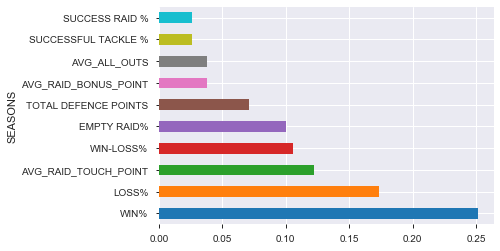

In [142]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [143]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT',
       'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],
      dtype='object')


In [144]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT',
       'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [78]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error__l7_uiw0


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\cc1FgwMX.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [108]:
f_select = ['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'UNSUCCESSFUL RAID%',
 'EMPTY RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [109]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 7.51424783e+01, -1.22133613e-01, -2.10024253e-01,
        -3.37265056e-02, -2.15855870e-02,  1.63180935e-04,
         1.58093869e-15],
       [-1.18555919e+01,  1.96886504e+00, -1.07154644e+00,
        -1.48024292e-01,  6.90744730e-02, -4.14890831e-02,
         1.58093869e-15],
       [-8.52651890e-01,  2.31889590e-01,  1.68283090e+00,
         7.14812024e-02,  1.05778425e-01,  3.04781436e-02,
         1.58093869e-15],
       [-1.58575118e+01, -1.80883593e+00,  1.51532328e+00,
        -9.24432523e-02, -5.22895080e-02, -4.45225335e-02,
         1.58093869e-15],
       [-2.08619990e+01, -1.21805372e+00, -9.00110541e-01,
        -2.09869202e-01, -2.34507229e-02,  5.28128702e-02,
         1.58093869e-15],
       [-1.08640437e+01, -1.82987212e+00, -1.33730995e+00,
         2.81751096e-01,  1.53927077e-02, -1.11390417e-02,
         1.58093869e-15],
       [-1.48506800e+01,  2.77814076e+00,  3.20837001e-01,
         1.30830954e-01, -9.29197881e-02,  1.36964636e-02,
         1.5809386

In [110]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [145]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5187.0,0.43,0.46,102.0,1293.0,0.617886,0.056911,0.325203,1.900000,0.216117,0.445922,14.032520,3.918699,0.577849,1.357724
SEASON 7,5.0,646.0,0.41,0.48,16.0,159.0,0.500000,0.062500,0.437500,1.142857,0.229102,0.448916,13.312500,3.312500,0.565868,1.375000
SEASON 6,2.0,978.0,0.47,0.52,15.0,289.0,0.652174,0.086957,0.260870,2.500000,0.200409,0.419223,16.173913,3.782609,0.508961,1.782609
SEASON 5,4.0,963.0,0.44,0.37,26.0,202.0,0.454545,0.000000,0.545455,0.833333,0.227414,0.438214,13.545455,5.500000,0.673469,0.954545
SEASON 4,4.0,594.0,0.38,0.41,11.0,121.0,0.500000,0.071429,0.428571,1.166667,0.220539,0.462963,11.714286,4.500000,0.624573,1.071429
SEASON 3,1.0,685.0,0.37,0.51,6.0,169.0,0.812500,0.000000,0.187500,4.333333,0.202920,0.496350,13.187500,2.625000,0.504559,1.687500
SEASON 2,1.0,697.0,0.34,0.54,16.0,196.0,0.875000,0.000000,0.125000,7.000000,0.220947,0.510760,12.875000,1.937500,0.505495,1.250000
SEASON 1,2.0,624.0,0.56,0.38,12.0,157.0,0.562500,0.187500,0.250000,2.250000,0.214744,0.352564,16.375000,5.312500,0.645477,1.312500


In [146]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [147]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,646.0,0.41,0.48,16.0,159.0,0.5,0.0625,0.4375,1.142857,0.229102,0.448916,13.3125,3.3125,0.565868,1.375


In [148]:
y_test

SEASON 7    5.0
Name: FINISHING POSITION, dtype: float64

In [149]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [150]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[16:24:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.92531	validation_1-rmse:4.4375
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.80053	validation_1-rmse:4.37969
[2]	validation_0-rmse:1.681	validation_1-rmse:4.17363
[3]	validation_0-rmse:1.56944	validation_1-rmse:3.9813
[4]	validation_0-rmse:1.46532	validation_1-rmse:3.8018
[5]	validation_0-rmse:1.36816	validation_1-rmse:3.63426
[6]	validation_0-rmse:1.27749	validation_1-rmse:3.47789
[7]	validation_0-rmse:1.19287	validation_1-rmse:3.33195
[8]	validation_0-rmse:1.11391	validation_1-rmse:3.19574
[9]	validation_0-rmse:1.04024	validation_1-rmse:3.0686
[10]	validation_0-rmse:0.97149	validation_1-rmse:2.94995
[11]	validation_0-rmse:0.907347	validation_1-rmse:2.8392
[12]	vali

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[92]	validation_0-rmse:0.003628	validation_1-rmse:1.29435
[93]	validation_0-rmse:0.003406	validation_1-rmse:1.29398
[94]	validation_0-rmse:0.003179	validation_1-rmse:1.29364
[95]	validation_0-rmse:0.002985	validation_1-rmse:1.29331
[96]	validation_0-rmse:0.002787	validation_1-rmse:1.29302
[97]	validation_0-rmse:0.002617	validation_1-rmse:1.29273
[98]	validation_0-rmse:0.002458	validation_1-rmse:1.29246
[99]	validation_0-rmse:0.002296	validation_1-rmse:1.29222
[100]	validation_0-rmse:0.002146	validation_1-rmse:1.292
[101]	validation_0-rmse:0.002021	validation_1-rmse:1.29179
[102]	validation_0-rmse:0.001905	validation_1-rmse:1.29158
[103]	validation_0-rmse:0.001797	validation_1-rmse:1.2914
[104]	validation_0-rmse:0.001679	validation_1-rmse:1.29122
[105]	validation_0-rmse:0.001585	validation_1-rmse:1.29106
[106]	validation_0-rmse:0.001482	validation_1-rmse:1.29091
[107]	validation_0-rmse:0.001399	validation_1-rmse:1.29076
[108]	validation_0-rmse:0.001309	validation_1-rmse:1.29063
[109]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [151]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [152]:
pred['MW_Prediction']

0    3.710475
Name: MW_Prediction, dtype: float32

In [153]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[4.0]

## Finding the win-loss% of a team for Season 7

In [154]:
df6.loc['SEASON 7','WIN-LOSS%']

1.1428571428571428

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [155]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.3219814241486068

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [156]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.33796028532870637

## Finding the Super-performance total of the team

In [157]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 20

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

25.0